In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
df = pd.read_json("/home/zeng/INFLUENZA_DATABASE/H3N2/data/isolation_information.json", orient='index')
df = df.replace('', np.nan)

In [4]:
df['region'] = df['location'].str.split(' / ').str.get(0)
df['country'] = df['location'].str.split(' / ').str.get(1)
df.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357698,EPI1447700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-01,NaN,Asia / Malaysia,A/Malaysia/1016/2003,Asia,Malaysia
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_357648,EPI1447603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-12-01,NaN,Oceania / Australia / Tasmania,A/Victoria/101/2003,Oceania,Australia
EPI_ISL_357641,EPI1447592,NaN,EPI1447591,NaN,NaN,NaN,NaN,NaN,2003-08-26,NaN,Oceania / Australia,A/Tasmania/1/2003,Oceania,Australia
EPI_ISL_357613,EPI1447537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-21,NaN,Asia / Singapore,A/Singapore/31/2003,Asia,Singapore


In [5]:
# 按条件修改列值
df.loc[df.region == '/ Taiwan', 'country'] = 'Taiwan'
df.loc[df.region == '/ Taiwan', 'region'] = 'Asia'

df.loc[df.region == '/ SPAIN', 'country'] = 'Spain'
df.loc[df.region == '/ SPAIN', 'region'] = 'Europe'

df.loc[df.region == '/ Laos', 'country'] = 'Laos'
df.loc[df.region == '/ Laos', 'region'] = 'Asia'

## 分布描述

In [6]:
df['region'].value_counts()

North America    33852
Europe           25763
Asia             23210
Oceania           7748
South America     4398
Africa            2824
Name: region, dtype: int64

In [8]:
df.groupby('region').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,country
region,,,,,,,,,,,,,
Africa,2790,1492,2439,1097,1083,1081,1064,1059,2824,0,2824,2824,2824
Asia,21106,9760,14721,5550,5573,5628,5476,5364,23210,0,23210,23210,23207
Europe,20447,7259,14299,6216,6183,5926,5691,5815,25763,0,25763,25763,25756
North America,33590,23088,23975,20951,20779,19948,20469,20512,33852,2,33852,33852,33850
Oceania,7681,6261,6885,2674,2636,2655,2643,2643,7748,0,7748,7748,7748
South America,4283,2388,3021,2177,2151,2137,2147,2153,4398,0,4398,4398,4397


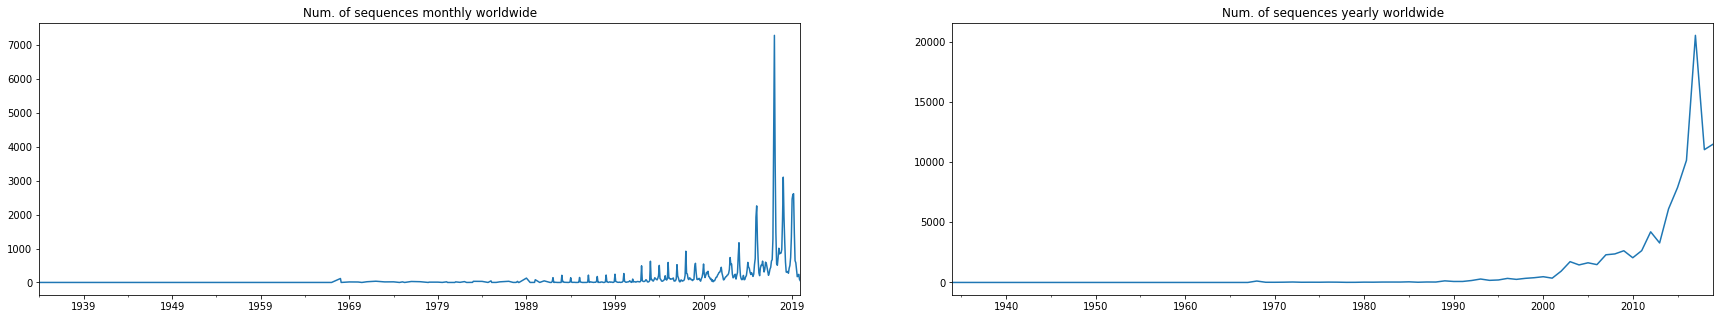

In [10]:
time_index_by_month = pd.to_datetime(df.date.values).to_period('M')
time_index_by_year = pd.to_datetime(df.date.values).to_period('Y')

fig, axes = plt.subplots(1, 2, figsize=(30, 5))
df.groupby(time_index_by_month).size().plot(ax=axes[0], title="Num. of sequences monthly worldwide")
df.groupby(time_index_by_year).size().plot(ax=axes[1], title="Num. of sequences yearly worldwide")

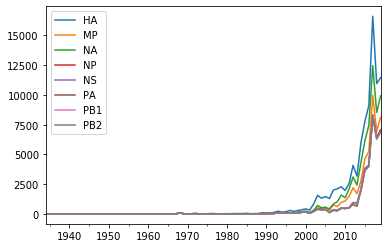

In [11]:
df.iloc[:,0:8].groupby(time_index_by_year).count().plot()

## 全基因组分析

In [8]:
def f(x):
    count = 0
    for i in x:
        if i == np.nan:
            count += 1
    return count

df_with_genome = df[df.iloc[:, 0:8].count(axis='columns') == 8]

In [9]:
df_with_genome.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_302517,EPI1193545,EPI1193548,EPI1193547,EPI1193546,EPI1193549,EPI1193544,EPI1193543,EPI1193542,2003-03-04,NaN,North America / Mexico,A/Mexico/InDRE2664/2003,North America,Mexico
EPI_ISL_154544,EPI502273,EPI502275,EPI502277,EPI502279,EPI502281,EPI501853,EPI502283,EPI502285,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154543,EPI502219,EPI502220,EPI502221,EPI502222,EPI502223,EPI501852,EPI502224,EPI502225,2005-01-01,NaN,North America / United States / Washington,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154540,EPI502300,EPI502302,EPI502304,EPI502306,EPI502308,EPI501849,EPI502310,EPI502312,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States


In [10]:
with open("/home/zeng/Desktop/index_with_genome", "w") as f:
    f.writelines("\n".join(df_with_genome.index.values))

In [11]:
import sys, os
def read_label(path):
    with open(path) as f:
        lines = f.readlines()
    return {line.split()[0].strip(): [line.split()[1].strip(), _region] for line in lines}

label_path = "/home/zeng/Desktop/Global_traced_label/"
global_label = {}
files = os.listdir(label_path)
regions = [name.split("_")[0] for name in files]

for _region, _file in zip(regions, files):
    current_path = os.path.join(label_path, _file)
    data = read_label(current_path)
    global_label.update(data)

In [12]:
_label = pd.DataFrame(global_label).T
_label.head()

,0,1
EPI564512,4,USA
EPI575362,4,USA
EPI575649,4,USA
EPI932479,4,USA
EPI662817,4,USA


In [13]:
df_with_cluster = pd.merge(df_with_genome, _label, left_on='HA', right_index=True)
df_with_cluster = df_with_cluster.rename(columns={0:"cluster", 1:"region2"})
df_with_cluster.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country,cluster,region2
EPI_ISL_143045,EPI458038,EPI458171,EPI458304,EPI458436,EPI458551,EPI458953,EPI458636,EPI459036,2009-06-26,NaN,Asia / Singapore,A/Singapore/H2009.485/2009,Asia,Singapore,3,SEAsia
EPI_ISL_143017,EPI458010,EPI458143,EPI458276,EPI458409,EPI458527,EPI458925,EPI458610,EPI458739,2009-11-11,NaN,Asia / Singapore,A/Singapore/C2009.863/2009,Asia,Singapore,3,SEAsia
EPI_ISL_143016,EPI458009,EPI458142,EPI458275,EPI458408,EPI458526,EPI458924,EPI458802,EPI458738,2009-07-07,NaN,Asia / Singapore,A/Singapore/C2009.515/2009,Asia,Singapore,3,SEAsia
EPI_ISL_142941,EPI457927,EPI458068,EPI458201,EPI458334,EPI458463,EPI458869,EPI458816,EPI458668,2009-06-26,NaN,Asia / Singapore,A/Singapore/C2009.485a/2009,Asia,Singapore,3,SEAsia
EPI_ISL_140227,EPI444788,EPI445512,EPI445246,EPI445003,EPI446335,EPI456790,EPI444355,EPI444085,2009-06-06,NaN,Asia / Taiwan,A/Taiwan/749/2009,Asia,Taiwan,3,SEAsia


In [14]:
df_with_cluster.groupby(['region2', 'cluster']).size().unstack(1)

cluster,0,1,10,11,12,16,17,19,2,21,...,34,35,36,4,40,5,6,7,8,9
region2,,,,,,,,,,,,,,,,,,,,,
Aus,465.0,60.0,8.0,NaN,NaN,NaN,80.0,NaN,234.0,NaN,...,NaN,NaN,NaN,247.0,130.0,82.0,61.0,66.0,NaN,NaN
Europe,52.0,1485.0,NaN,NaN,NaN,14.0,332.0,NaN,94.0,23.0,...,NaN,NaN,NaN,667.0,NaN,16.0,NaN,358.0,NaN,NaN
SEAsia,597.0,43.0,34.0,NaN,NaN,NaN,NaN,45.0,156.0,NaN,...,NaN,NaN,NaN,134.0,NaN,19.0,294.0,461.0,180.0,NaN
USA,2959.0,244.0,NaN,1137.0,125.0,NaN,NaN,NaN,3664.0,NaN,...,347.0,12.0,34.0,644.0,NaN,236.0,268.0,504.0,1581.0,618.0


In [15]:
df_with_cluster['cluster2'] = df_with_cluster.region2.str.cat(df_with_cluster.cluster, sep='_')
df_with_cluster.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country,cluster,region2,cluster2
EPI_ISL_143045,EPI458038,EPI458171,EPI458304,EPI458436,EPI458551,EPI458953,EPI458636,EPI459036,2009-06-26,NaN,Asia / Singapore,A/Singapore/H2009.485/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_143017,EPI458010,EPI458143,EPI458276,EPI458409,EPI458527,EPI458925,EPI458610,EPI458739,2009-11-11,NaN,Asia / Singapore,A/Singapore/C2009.863/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_143016,EPI458009,EPI458142,EPI458275,EPI458408,EPI458526,EPI458924,EPI458802,EPI458738,2009-07-07,NaN,Asia / Singapore,A/Singapore/C2009.515/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_142941,EPI457927,EPI458068,EPI458201,EPI458334,EPI458463,EPI458869,EPI458816,EPI458668,2009-06-26,NaN,Asia / Singapore,A/Singapore/C2009.485a/2009,Asia,Singapore,3,SEAsia,SEAsia_3
EPI_ISL_140227,EPI444788,EPI445512,EPI445246,EPI445003,EPI446335,EPI456790,EPI444355,EPI444085,2009-06-06,NaN,Asia / Taiwan,A/Taiwan/749/2009,Asia,Taiwan,3,SEAsia,SEAsia_3


In [17]:
cluster_label = {}
with open("/home/zeng/Desktop/cluster_label.txt") as f:
    for line in f:
        cluster = line.split(" ")[0]
        label = line.split(" ")[1][0:-1]
        cluster_label[cluster] = label

In [18]:
df_with_cluster['cluster3'] = df_with_cluster.cluster2.map(cluster_label)
df_with_cluster.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country,cluster,region2,cluster2,cluster3
EPI_ISL_143045,EPI458038,EPI458171,EPI458304,EPI458436,EPI458551,EPI458953,EPI458636,EPI459036,2009-06-26,NaN,Asia / Singapore,A/Singapore/H2009.485/2009,Asia,Singapore,3,SEAsia,SEAsia_3,WA09
EPI_ISL_143017,EPI458010,EPI458143,EPI458276,EPI458409,EPI458527,EPI458925,EPI458610,EPI458739,2009-11-11,NaN,Asia / Singapore,A/Singapore/C2009.863/2009,Asia,Singapore,3,SEAsia,SEAsia_3,WA09
EPI_ISL_143016,EPI458009,EPI458142,EPI458275,EPI458408,EPI458526,EPI458924,EPI458802,EPI458738,2009-07-07,NaN,Asia / Singapore,A/Singapore/C2009.515/2009,Asia,Singapore,3,SEAsia,SEAsia_3,WA09
EPI_ISL_142941,EPI457927,EPI458068,EPI458201,EPI458334,EPI458463,EPI458869,EPI458816,EPI458668,2009-06-26,NaN,Asia / Singapore,A/Singapore/C2009.485a/2009,Asia,Singapore,3,SEAsia,SEAsia_3,WA09
EPI_ISL_140227,EPI444788,EPI445512,EPI445246,EPI445003,EPI446335,EPI456790,EPI444355,EPI444085,2009-06-06,NaN,Asia / Taiwan,A/Taiwan/749/2009,Asia,Taiwan,3,SEAsia,SEAsia_3,WA09


In [19]:
df_with_cluster.groupby(['region2', 'cluster3']).size().unstack(1)

cluster3,BNE07,CH13,CH13+,CH17,CH17-,HK14,HK14+,HK14-,KS17,SA19,SA19+,SG16,TX12,VIC11,WA09
region2,,,,,,,,,,,,,,,
Aus,NaN,66.0,NaN,234.0,80.0,465.0,NaN,130.0,61.0,82.0,NaN,247.0,50.0,60.0,8.0
Europe,16.0,94.0,NaN,686.0,23.0,1485.0,NaN,14.0,332.0,358.0,14.0,667.0,NaN,52.0,NaN
SEAsia,19.0,156.0,NaN,294.0,131.0,597.0,NaN,45.0,NaN,180.0,34.0,461.0,43.0,134.0,137.0
USA,236.0,644.0,504.0,3601.0,347.0,2959.0,1581.0,34.0,3664.0,618.0,12.0,1137.0,268.0,244.0,125.0


In [20]:
time_index_by_month = pd.to_datetime(df_with_cluster.date.values).to_period('M')
time_index_by_quarter = pd.to_datetime(df_with_cluster.date.values).to_period('Q-DEC')
time_index_by_year = pd.to_datetime(df_with_cluster.date.values).to_period('A-OCT')

In [41]:
df_with_cluster.groupby([time_index_by_year,'region2', 'cluster3']).size().unstack(0)

2008   2009  2010   2011  2012   2013   2014    2015  \
region2 cluster3                                                          
Aus     CH13        NaN    NaN   NaN    NaN   1.0   11.0   35.0    19.0   
        CH17        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        CH17-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        HK14        NaN    NaN   NaN    NaN   NaN    NaN   15.0   200.0   
        HK14-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        KS17        NaN    NaN   NaN    NaN   NaN    NaN   14.0     3.0   
        SA19        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SG16        NaN    NaN   NaN    NaN   NaN    NaN    2.0    10.0   
        TX12        NaN    NaN   NaN    1.0  29.0   14.0    2.0     2.0   
        VIC11       NaN    4.0   3.0    8.0  43.0    2.0    NaN     NaN   
        WA09        NaN    7.0   NaN    NaN   NaN    1.0    NaN     NaN   
Europe  BNE07       2.0   14.0   NaN    NaN   NaN    NaN    NaN     NaN   
        CH13        NaN    NaN   NaN    NaN   NaN    NaN   14.0    79.0   
        CH17        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        CH17-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        HK14        NaN    NaN   NaN    NaN   NaN    NaN   31.0   281.0   
        HK14-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        KS17        NaN    NaN   NaN    NaN   NaN    NaN    9.0    32.0   
        SA19        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SA19+       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SG16        NaN    NaN   NaN    NaN   NaN    NaN    NaN     3.0   
        VIC11       NaN    1.0   3.0   11.0  32.0    NaN    3.0     2.0   
SEAsia  BNE07      11.0    7.0   1.0    NaN   NaN    NaN    NaN     NaN   
        CH13        NaN    NaN   NaN    NaN   1.0   29.0   59.0    62.0   
        CH17        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        CH17-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        HK14        NaN    NaN   NaN    NaN   NaN    NaN   12.0   153.0   
        HK14-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SA19        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SA19+       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SG16        NaN    NaN   NaN    NaN   NaN    NaN    NaN     2.0   
        TX12        NaN    NaN   1.0    6.0  10.0   10.0    8.0     8.0   
        VIC11       NaN   17.0  26.0   84.0   7.0    NaN    NaN     NaN   
        WA09        NaN  105.0  22.0   10.0   NaN    NaN    NaN     NaN   
USA     BNE07     132.0  104.0   NaN    NaN   NaN    NaN    NaN     NaN   
        CH13        NaN    NaN   NaN    NaN  13.0  266.0  106.0   259.0   
        CH13+       NaN    NaN   NaN    NaN   NaN    1.0   42.0    47.0   
        CH17        NaN    NaN   NaN    NaN   NaN    NaN    NaN     1.0   
        CH17-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        HK14        NaN    NaN   NaN    NaN   NaN    NaN  218.0  2030.0   
        HK14+       NaN    NaN   NaN    NaN   NaN    NaN    2.0     7.0   
        HK14-       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        KS17        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SA19        NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SA19+       NaN    NaN   NaN    NaN   NaN    NaN    NaN     NaN   
        SG16        NaN    NaN   NaN    NaN   NaN    NaN    NaN    13.0   
        TX12        NaN    NaN   NaN    NaN  20.0  211.0    5.0    31.0   
        VIC11       NaN    6.0   5.0  124.0  52.0   57.0    NaN     NaN   
        WA09        NaN  119.0   NaN    6.0   NaN    NaN    NaN     NaN   

                   2016    2017    2018    2019  
region2 cluster3                                 
Aus     CH13        NaN     NaN     NaN     NaN  
        CH17        2.0    74.0   148.0    

In [21]:
summary = df_with_cluster.groupby(['region2', time_index_by_quarter, 'cluster3']).size().unstack(2).fillna(0)
summary_pct = summary.div(summary.sum(axis=1), axis=0)
summary_pct

cluster3        BNE07      CH13     CH13+      CH17     CH17-      HK14  \
region2                                                                   
Aus     2009Q2    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2009Q3    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2010Q2    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2010Q3    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2010Q4    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2011Q1    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2011Q3    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2011Q4    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q1    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q2    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q3    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q4    0.0  0.333333  0.000000  0.000000  0.000000  0.000000   
        2013Q1    0.0  0.285714  0.000000  0.000000  0.000000  0.000000   
        2013Q2    0.0  0.571429  0.000000  0.000000  0.000000  0.000000   
        2013Q3    0.0  0.285714  0.000000  0.000000  0.000000  0.000000   
        2013Q4    0.0  0.500000  0.000000  0.000000  0.000000  0.000000   
        2014Q1    0.0  0.583333  0.000000  0.000000  0.000000  0.333333   
        2014Q2    0.0  0.333333  0.000000  0.000000  0.000000  0.047619   
        2014Q3    0.0  0.633333  0.000000  0.000000  0.000000  0.300000   
        2014Q4    0.0  0.363636  0.000000  0.000000  0.000000  0.363636   
        2015Q1    0.0  0.128205  0.000000  0.000000  0.000000  0.666667   
        2015Q2    0.0  0.075758  0.000000  0.000000  0.000000  0.893939   
        2015Q3    0.0  0.062500  0.000000  0.000000  0.000000  0.901786   
        2015Q4    0.0  0.000000  0.000000  0.000000  0.000000  1.000000   
        2016Q1    0.0  0.000000  0.000000  0.000000  0.000000  0.846154   
        2016Q2    0.0  0.000000  0.000000  0.000000  0.000000  0.600000   
        2016Q3    0.0  0.000000  0.000000  0.009615  0.009615  0.615385   
        2016Q4    0.0  0.000000  0.000000  0.114286  0.000000  0.571429   
        2017Q1    0.0  0.000000  0.000000  0.138462  0.076923  0.461538   
        2017Q2    0.0  0.000000  0.000000  0.023810  0.071429  0.452381   
...               ...       ...       ...       ...       ...       ...   
USA     2012Q3    0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
        2012Q4    0.0  0.380952  0.000000  0.000000  0.000000  0.000000   
        2013Q1    0.0  0.595819  0.000000  0.000000  0.000000  0.000000   
        2013Q2    0.0  1.000000  0.000000  0.000000  0.000000  0.000000   
        2013Q3    0.0  0.750000  0.125000  0.000000  0.000000  0.000000   
        2013Q4    0.0  0.571429  0.000000  0.000000  0.000000  0.428571   
        2014Q1    0.0  0.000000  0.230769  0.000000  0.000000  0.769231   
        2014Q2    0.0  0.000000  0.235294  0.000000  0.000000  0.705882   
        2014Q3    0.0  0.336449  0.158879  0.000000  0.000000  0.467290   
        2014Q4    0.0  0.233880  0.046995  0.000000  0.000000  0.708197   
        2015Q1    0.0  0.118889  0.021111  0.001111  0.000000  0.831111   
        2015Q2    0.0  0.023529  0.000000  0.000000  0.000000  0.976471   
        2015Q3    0.0  0.000000  0.006186  0.000000  0.000000  0.958763   
        2015Q4    0.0  0.000000  0.035144  0.000000  0.000000  0.948882   
        2016Q1    0.0  0.000000  0.405882  0.000000  0.000000  0.466667   
        2016Q2    0.0  0.000000  0.599099  0.000000  0.000000  0.216216   
        2016Q3    0.0  0.000000  0.029851  0.000000  0.039801  0.457711   
        2016Q4    0.0  0.000000  0.035809  0.145889  0.067639  0.143236   
        2017Q1    0.0  0.000000  0.013397  0.184211  0.075120  0.024402   
        2017Q2    0.0  0.000000  0.003663  0.223443  0.065934  0.014652   
        2017Q3    0.0  0.

In [22]:
print('\n'.join(summary_pct.columns.values))

BNE07
CH13
CH13+
CH17
CH17-
HK14
HK14+
HK14-
KS17
SA19
SA19+
SG16
TX12
VIC11
WA09


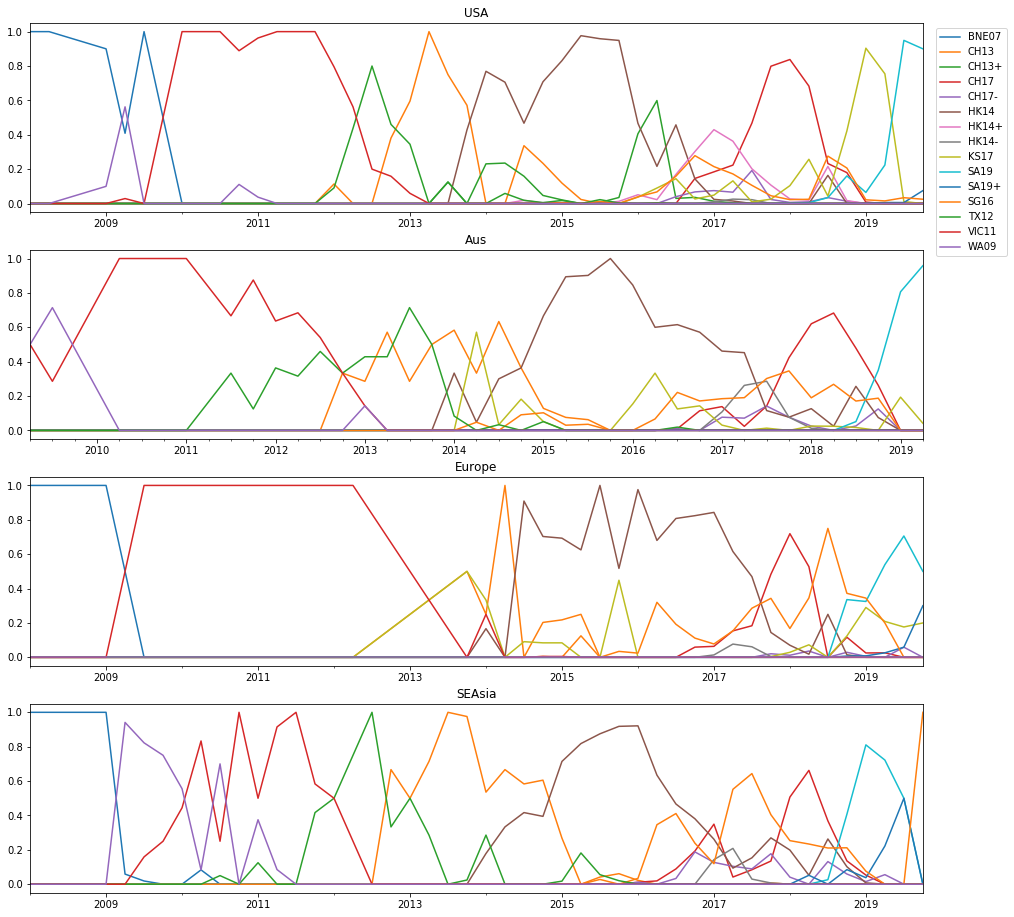

In [23]:
fig, axes = plt.subplots(4, 1, figsize=(16, 16))
summary_pct.loc['USA', :].plot(ax=axes[0], legend=False, title='USA')
summary_pct.loc['Aus', :].plot(ax=axes[1], legend=False, title='Aus')
summary_pct.loc['Europe', :].plot(ax=axes[2], legend=False, title='Europe')
summary_pct.loc['SEAsia', :].plot(ax=axes[3], legend=False, title='SEAsia')

plt.legend(bbox_to_anchor=(1.1, 4.6))

## 全球分析

In [54]:
df_sample = df_with_cluster.groupby([time_index_by_year, 'region2']).apply(lambda x: x if len(x) < 100 else x.sample(100, random_state=1)).reset_index([0,1], drop=True)
df_sample = df_sample[['HA', 'MP', 'NA', 'NP', 'NS', 'PA', 'PB1', 'PB2', 'region2', 'cluster3', 'name', 'date']]
df_sample.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,region2,cluster3,name,date
EPI_ISL_164037,EPI535428,EPI535431,EPI535430,EPI535429,EPI535432,EPI535427,EPI535426,EPI535425,Europe,BNE07,A/Paris/2030/2008,2008-02-25
EPI_ISL_164038,EPI535436,EPI535439,EPI535438,EPI535437,EPI535440,EPI535435,EPI535434,EPI535433,Europe,BNE07,A/Paris/123/2008,2008-10-21
EPI_ISL_140220,EPI444782,EPI445505,EPI445239,EPI444996,EPI446327,EPI456796,EPI444348,EPI444078,SEAsia,BNE07,A/Taiwan/21/2008,2008-01-17
EPI_ISL_140212,EPI444783,EPI445507,EPI445241,EPI444998,EPI446329,EPI456793,EPI444350,EPI444070,SEAsia,BNE07,A/Taiwan/424/2008,2008-07-16
EPI_ISL_140219,EPI444781,EPI445504,EPI445238,EPI444995,EPI446326,EPI456791,EPI444347,EPI444077,SEAsia,BNE07,A/Taiwan/4/2008,2008-01-04


In [31]:
df_sample.to_json("/home/zeng/Desktop/sample_index", orient='index', date_format='iso')
#df_sample.to_csv("/home/zeng/Desktop/sample_index2", header=True, index_label='EPI_ISL', date_format='%Y-%m-%d')

In [32]:
df_sample.groupby(['region2', 'cluster3']).size().unstack()

cluster3,BNE07,CH13,CH13+,CH17,CH17-,HK14,HK14+,HK14-,KS17,SA19,SA19+,SG16,TX12,VIC11,WA09
region2,,,,,,,,,,,,,,,
Aus,NaN,55.0,NaN,70.0,21.0,212.0,NaN,26.0,38.0,68.0,NaN,76.0,48.0,60.0,8.0
Europe,16.0,34.0,NaN,68.0,5.0,277.0,NaN,1.0,56.0,36.0,NaN,77.0,NaN,50.0,NaN
SEAsia,17.0,117.0,NaN,77.0,22.0,190.0,NaN,5.0,NaN,62.0,17.0,105.0,41.0,130.0,114.0
USA,141.0,105.0,40.0,109.0,9.0,203.0,48.0,1.0,95.0,20.0,1.0,35.0,60.0,163.0,60.0


In [43]:
import json

def read_fasta(path):
    with open(path) as f:
        result = {}
        for line in f:
            if line.startswith(">"):
                label = line[1:-1]
                result[label] = ""
            else:
                result[label] += line.strip()
    return result

def read_seg(path, seg1, seg2):
    segment_sequences = pd.Series(read_fasta(path))
    segment_sequences = segment_sequences[df_sample['%s' % seg1]]
    segment_sequences.index = df_sample.index
    segment_sequences.name = 'sequence'
    seg_sample = df_sample[['region2', 'cluster3', 'name', 'date']].merge(segment_sequences, left_index=True, right_index=True)
    with open('/home/zeng/Desktop/sample2/sample_%s.fasta' % seg2, 'w') as f:
        for index, region, cluster, date, sequence in zip(seg_sample.index, seg_sample.region2, seg_sample.cluster3, seg_sample.date, seg_sample.sequence):
            f.write(">%s_%s_%s_%s\n%s\n" % (index, region, cluster, date.strftime("%Y-%m-%d"), sequence))

read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_HA.fasta", "HA", "HA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NA.fasta", "NA", "NA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M1.fasta", "MP", "M1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M2.fasta", "MP", "M2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NP.fasta", "NP", "NP")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NS1.fasta", "NS", "NS1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PA.fasta", "PA", "PA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1-F2.fasta", "PB1", "PB1-F2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1.fasta", "PB1", "PB1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB2.fasta", "PB2", "PB2")

## 地区分析

### 美国

In [60]:
df_with_cluster_usa = df_with_cluster[df_with_cluster.region2 == 'USA']
time_index_by_month_usa = pd.to_datetime(df_with_cluster_usa.date.values).to_period('M')
time_index_by_quarter_usa = pd.to_datetime(df_with_cluster_usa.date.values).to_period('Q-DEC')
time_index_by_year_usa = pd.to_datetime(df_with_cluster_usa.date.values).to_period('A-OCT')

In [66]:
df_sample_usa = df_with_cluster_usa.groupby([time_index_by_year_usa, 'cluster3']).apply(lambda x: x if len(x) < 100 else x.sample(100, random_state=1)).reset_index([0, 1], drop=True)
df_sample_usa = df_sample_usa[['HA', 'MP', 'NA', 'NP', 'NS', 'PA', 'PB1', 'PB2', 'region2', 'cluster3', 'name', 'date']]
df_sample_usa.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,region2,cluster3,name,date
EPI_ISL_28871,EPI173961,EPI173962,EPI173963,EPI173964,EPI173965,EPI173966,EPI173967,EPI173968,USA,BNE07,A/California/UR07-0019/2008,2008-02-13
EPI_ISL_62774,EPI219494,EPI219495,EPI219496,EPI219497,EPI219498,EPI219499,EPI219500,EPI219501,USA,BNE07,A/Boston/19/2008,2008-01-28
EPI_ISL_29279,EPI175071,EPI175072,EPI175073,EPI175074,EPI175075,EPI175076,EPI175077,EPI175078,USA,BNE07,A/Kentucky/UR07-0082/2008,2008-02-25
EPI_ISL_29637,EPI176711,EPI176712,EPI176713,EPI176714,EPI176715,EPI176716,EPI176717,EPI176718,USA,BNE07,A/California/UR07-0076/2008,2008-02-21
EPI_ISL_29092,EPI174480,EPI174481,EPI174482,EPI174483,EPI174484,EPI174485,EPI174486,EPI174487,USA,BNE07,A/Kansas/UR07-0129/2008,2008-03-05


In [76]:
time_index_by_quarter_usa_sample = pd.to_datetime(df_sample_usa.date.values).to_period('Q-DEC')
time_index_by_year_usa_sample = pd.to_datetime(df_sample_usa.date.values).to_period('A-OCT')
df_sample_usa.groupby([time_index_by_year_usa_sample, 'cluster3']).size().unstack()

cluster3,BNE07,CH13,CH13+,CH17,CH17-,HK14,HK14+,HK14-,KS17,SA19,SA19+,SG16,TX12,VIC11,WA09
2008,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,100.0
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,6.0
2012,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,52.0,NaN
2013,NaN,100.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,57.0,NaN
2014,NaN,100.0,42.0,NaN,NaN,100.0,2.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
2015,NaN,100.0,47.0,1.0,NaN,100.0,7.0,NaN,NaN,NaN,NaN,13.0,31.0,NaN,NaN
2016,NaN,NaN,100.0,5.0,12.0,100.0,100.0,NaN,77.0,NaN,NaN,100.0,1.0,NaN,NaN
2017,NaN,NaN,46.0,100.0,100.0,100.0,100.0,34.0,100.0,NaN,NaN,100.0,NaN,NaN,NaN


In [77]:
import json

def read_fasta(path):
    with open(path) as f:
        result = {}
        for line in f:
            if line.startswith(">"):
                label = line[1:-1]
                result[label] = ""
            else:
                result[label] += line.strip()
    return result

def read_seg(path, db, seg1, seg2):
    segment_sequences = pd.Series(read_fasta(path))
    segment_sequences = segment_sequences[db['%s' % seg1]]
    segment_sequences.index = db.index
    segment_sequences.name = 'sequence'
    seg_sample = db[['region2', 'cluster3', 'name', 'date']].merge(segment_sequences, left_index=True, right_index=True)
    with open('/home/zeng/Desktop/sample_usa/sample_%s.fasta' % seg2, 'w') as f:
        for index, region, cluster, date, sequence in zip(seg_sample.index, seg_sample.region2, seg_sample.cluster3, seg_sample.date, seg_sample.sequence):
            f.write(">%s_%s_%s_%s\n%s\n" % (index, region, cluster, date.strftime("%Y-%m-%d"), sequence))

read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_HA.fasta", df_sample_usa, "HA", "HA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NA.fasta", df_sample_usa,"NA", "NA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M1.fasta", df_sample_usa,"MP", "M1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M2.fasta", df_sample_usa,"MP", "M2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NP.fasta", df_sample_usa,"NP", "NP")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NS1.fasta", df_sample_usa,"NS", "NS1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PA.fasta", df_sample_usa,"PA", "PA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1-F2.fasta", df_sample_usa,"PB1", "PB1-F2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1.fasta", df_sample_usa,"PB1", "PB1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB2.fasta", df_sample_usa,"PB2", "PB2")

### Europe

In [79]:
df_with_cluster_europe = df_with_cluster[df_with_cluster.region2 == 'Europe']
time_index_by_year_europe = pd.to_datetime(df_with_cluster_europe.date.values).to_period('A-OCT')
df_sample_europe = df_with_cluster_europe.groupby([time_index_by_year_europe, 'cluster3']).apply(lambda x: x if len(x) < 100 else x.sample(100, random_state=1)).reset_index([0, 1], drop=True)
df_sample_europe = df_sample_europe[['HA', 'MP', 'NA', 'NP', 'NS', 'PA', 'PB1', 'PB2', 'region2', 'cluster3', 'name', 'date']]

import json

def read_fasta(path):
    with open(path) as f:
        result = {}
        for line in f:
            if line.startswith(">"):
                label = line[1:-1]
                result[label] = ""
            else:
                result[label] += line.strip()
    return result

def read_seg(path, db, seg1, seg2):
    segment_sequences = pd.Series(read_fasta(path))
    segment_sequences = segment_sequences[db['%s' % seg1]]
    segment_sequences.index = db.index
    segment_sequences.name = 'sequence'
    seg_sample = db[['region2', 'cluster3', 'name', 'date']].merge(segment_sequences, left_index=True, right_index=True)
    with open('/home/zeng/Desktop/sample_europe/sample_%s.fasta' % seg2, 'w') as f:
        for index, region, cluster, date, sequence in zip(seg_sample.index, seg_sample.region2, seg_sample.cluster3, seg_sample.date, seg_sample.sequence):
            f.write(">%s_%s_%s_%s\n%s\n" % (index, region, cluster, date.strftime("%Y-%m-%d"), sequence))

read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_HA.fasta", df_sample_europe, "HA", "HA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NA.fasta", df_sample_europe,"NA", "NA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M1.fasta", df_sample_europe,"MP", "M1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M2.fasta", df_sample_europe,"MP", "M2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NP.fasta", df_sample_europe,"NP", "NP")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NS1.fasta", df_sample_europe,"NS", "NS1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PA.fasta", df_sample_europe,"PA", "PA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1-F2.fasta", df_sample_europe,"PB1", "PB1-F2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1.fasta", df_sample_europe,"PB1", "PB1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB2.fasta", df_sample_europe,"PB2", "PB2")

In [81]:
df_with_cluster_aus = df_with_cluster[df_with_cluster.region2 == 'Aus']
time_index_by_year_aus = pd.to_datetime(df_with_cluster_aus.date.values).to_period('A-OCT')
df_sample_aus = df_with_cluster_aus.groupby([time_index_by_year_aus, 'cluster3']).apply(lambda x: x if len(x) < 100 else x.sample(100, random_state=1)).reset_index([0, 1], drop=True)
df_sample_aus = df_sample_aus[['HA', 'MP', 'NA', 'NP', 'NS', 'PA', 'PB1', 'PB2', 'region2', 'cluster3', 'name', 'date']]

import json

def read_fasta(path):
    with open(path) as f:
        result = {}
        for line in f:
            if line.startswith(">"):
                label = line[1:-1]
                result[label] = ""
            else:
                result[label] += line.strip()
    return result

def read_seg(path, db, seg1, seg2):
    segment_sequences = pd.Series(read_fasta(path))
    segment_sequences = segment_sequences[db['%s' % seg1]]
    segment_sequences.index = db.index
    segment_sequences.name = 'sequence'
    seg_sample = db[['region2', 'cluster3', 'name', 'date']].merge(segment_sequences, left_index=True, right_index=True)
    with open('/home/zeng/Desktop/sample_aus/sample_%s.fasta' % seg2, 'w') as f:
        for index, region, cluster, date, sequence in zip(seg_sample.index, seg_sample.region2, seg_sample.cluster3, seg_sample.date, seg_sample.sequence):
            f.write(">%s_%s_%s_%s\n%s\n" % (index, region, cluster, date.strftime("%Y-%m-%d"), sequence))

read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_HA.fasta", df_sample_aus, "HA", "HA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NA.fasta", df_sample_aus,"NA", "NA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M1.fasta", df_sample_aus,"MP", "M1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M2.fasta", df_sample_aus,"MP", "M2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NP.fasta", df_sample_aus,"NP", "NP")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NS1.fasta", df_sample_aus,"NS", "NS1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PA.fasta", df_sample_aus,"PA", "PA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1-F2.fasta", df_sample_aus,"PB1", "PB1-F2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1.fasta", df_sample_aus,"PB1", "PB1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB2.fasta", df_sample_aus,"PB2", "PB2")

In [82]:
df_with_cluster_seasia = df_with_cluster[df_with_cluster.region2 == 'SEAsia']
time_index_by_year_seasia = pd.to_datetime(df_with_cluster_seasia.date.values).to_period('A-OCT')
df_sample_seasia = df_with_cluster_seasia.groupby([time_index_by_year_seasia, 'cluster3']).apply(lambda x: x if len(x) < 100 else x.sample(100, random_state=1)).reset_index([0, 1], drop=True)
df_sample_seasia = df_sample_seasia[['HA', 'MP', 'NA', 'NP', 'NS', 'PA', 'PB1', 'PB2', 'region2', 'cluster3', 'name', 'date']]

import json

def read_fasta(path):
    with open(path) as f:
        result = {}
        for line in f:
            if line.startswith(">"):
                label = line[1:-1]
                result[label] = ""
            else:
                result[label] += line.strip()
    return result

def read_seg(path, db, seg1, seg2):
    segment_sequences = pd.Series(read_fasta(path))
    segment_sequences = segment_sequences[db['%s' % seg1]]
    segment_sequences.index = db.index
    segment_sequences.name = 'sequence'
    seg_sample = db[['region2', 'cluster3', 'name', 'date']].merge(segment_sequences, left_index=True, right_index=True)
    with open('/home/zeng/Desktop/sample_seasia/sample_%s.fasta' % seg2, 'w') as f:
        for index, region, cluster, date, sequence in zip(seg_sample.index, seg_sample.region2, seg_sample.cluster3, seg_sample.date, seg_sample.sequence):
            f.write(">%s_%s_%s_%s\n%s\n" % (index, region, cluster, date.strftime("%Y-%m-%d"), sequence))

read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_HA.fasta", df_sample_seasia, "HA", "HA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NA.fasta", df_sample_seasia,"NA", "NA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M1.fasta", df_sample_seasia,"MP", "M1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_M2.fasta", df_sample_seasia,"MP", "M2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NP.fasta", df_sample_seasia,"NP", "NP")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_NS1.fasta", df_sample_seasia,"NS", "NS1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PA.fasta", df_sample_seasia,"PA", "PA")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1-F2.fasta", df_sample_seasia,"PB1", "PB1-F2")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB1.fasta", df_sample_seasia,"PB1", "PB1")
read_seg("/home/zeng/INFLUENZA_DATABASE/H3N2/data/Protein/protein_PB2.fasta", df_sample_seasia,"PB2", "PB2")